# Nonlinear Classification
Under construction (3 Oct 2018)

In [79]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import NeuralNetwork as NN
import Layer
import importlib
import time
from copy import deepcopy
from IPython.display import display
from ipywidgets import FloatProgress

importlib.reload(NN)
importlib.reload(Layer);

## Binary Mapping

In [80]:
# 8->4 binary mapping
n_samples = 100
s = np.array([[1,0,1,0,0,1,1,0],
                         [0,1,0,1,0,1,0,1],
                         [0,1,1,0,1,0,0,1],
                         [1,0,0,0,1,0,1,1],
                         [1,0,0,1,0,1,0,1]], dtype=float)
e = np.array([[0,1,1,1],[1,1,0,1],[1,0,1,1],[1,1,1,0],[0,0,0,0]])
classes = len(s)
training_input = []
training_output = []
r = 0
for n in range(n_samples):
    r = np.mod(r+1, classes) #r = np.random.randint(classes)
    training_input.append(np.array(s[r], dtype=float) + np.random.normal(scale=0.01,size=len(s[r])))
    training_output.append(np.array(e[r], dtype=float))

train = [training_input, training_output]

n_test_samples = 100
test_input = []
test_output = []
r = 0
for n in range(n_test_samples):
    r = np.mod(r+1, classes) #np.random.randint(classes)
    test_input.append(np.array(s[r], dtype=float) + np.random.normal(scale=0.01,size=len(s[r])))
    test_output.append(np.array(e[r], dtype=float))

test = [test_input, test_output]

for x, t in zip(s,e):
    print(str(np.array(x,dtype=int))+' -> '+str(t))

[1 0 1 0 0 1 1 0] -> [0 1 1 1]
[0 1 0 1 0 1 0 1] -> [1 1 0 1]
[0 1 1 0 1 0 0 1] -> [1 0 1 1]
[1 0 0 0 1 0 1 1] -> [1 1 1 0]
[1 0 0 1 0 1 0 1] -> [0 0 0 0]


In [81]:
net = NN.NeuralNetwork()
net.AddLayer(Layer.InputPELayer(n=8))
net.AddLayer(Layer.PELayer(n=5))
net.AddLayer(Layer.PELayer(n=5))
net.AddLayer(Layer.TopPELayer(n=4))

In [83]:
net.layers[-1].sigma(torch.tensor(0.5))

tensor(0.6225)

## Ring Classes

In [2]:
# Three classes, arranged in 3 rings
# Training set
train_samples1 = 200
training_input = []
training_output = []
for n in range(train_samples1):
    rho = np.random.normal()*0.2
    theta = np.random.rand()*2.*np.pi
    x = rho*np.cos(theta)
    y = rho*np.sin(theta)
    training_input.append(np.array([x,y]))
    training_output.append(np.array([1,0.,0]))

train_samples2 = train_samples1
for n in range(train_samples2):
    rho = np.random.normal()*0.1 + 0.6
    theta = np.random.rand()*2.*np.pi
    x = rho*np.cos(theta)
    y = rho*np.sin(theta)
    training_input.append(np.array([x,y]))
    training_output.append(np.array([0.,1,0]))

train_samples3 = train_samples1
for n in range(train_samples3):
    rho = np.random.normal()*0.1 + 1.
    theta = np.random.rand()*2.*np.pi
    x = rho*np.cos(theta)
    y = rho*np.sin(theta)
    training_input.append(np.array([x,y]))
    training_output.append(np.array([0.,0,1]))

train = [np.array(training_input), np.array(training_output)]

# Test set
n_samples1 = 50
test_input = []
test_output = []
for n in range(n_samples1):
    rho = np.random.normal()*0.2
    theta = np.random.rand()*2.*np.pi
    x = rho*np.cos(theta)
    y = rho*np.sin(theta)
    test_input.append(np.array([x,y]))
    test_output.append(np.array([1,0.,0]))

n_samples2 = n_samples1
for n in range(n_samples2):
    rho = np.random.normal()*0.1 + 0.6
    theta = np.random.rand()*2.*np.pi
    x = rho*np.cos(theta)
    y = rho*np.sin(theta)
    test_input.append(np.array([x,y]))
    test_output.append(np.array([0.,1,0]))

n_samples3 = n_samples1
for n in range(n_samples3):
    rho = np.random.normal()*0.1 + 1.
    theta = np.random.rand()*2.*np.pi
    x = rho*np.cos(theta)
    y = rho*np.sin(theta)
    test_input.append(np.array([x,y]))
    test_output.append(np.array([0.,0,1]))

test = [np.array(test_input), np.array(test_output)]

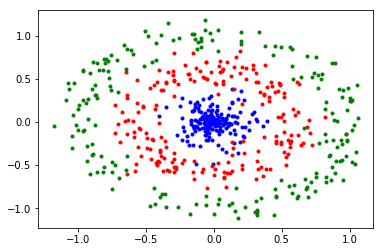

In [3]:
end1 = train_samples1
end2 = train_samples1+train_samples2
plt.plot(train[0][:end1,0], train[0][:end1,1], 'b.')
plt.plot(train[0][end1:end2,0], train[0][end1:end2,1], 'r.');
plt.plot(train[0][end2:,0], train[0][end2:,1], 'g.');

In [4]:
net = NN.NeuralNetwork()
net.AddLayer(Layer.InputPELayer(n=2))
net.AddLayer(Layer.PELayer(n=50))
net.AddLayer(Layer.PELayer(n=50))
net.AddLayer(Layer.TopPELayer(n=3))

## Train

In [62]:
train_shuffle = list(zip(train[0],train[1]))
np.random.shuffle(train_shuffle)

In [63]:
net.learning_tau = 2.
epochs = 5
fp = FloatProgress(min=0,max=epochs)  
display(fp)
T = 3
start_time = time.time()
for k in range(epochs):
    np.random.shuffle(train_shuffle)
    for x in train_shuffle:
        net.Infer(T, x[0], x[1])
    fp.value += 1
end_time = time.time()
print('Total time: '+str(end_time-start_time))

A Jupyter Widget

Total time: 47.94276285171509


## Test

### Run the model on the test dataset

In [66]:
# Test the feedback (generative) performance
beta = 1. # 1 for FF, 0 for FB
inf_layer = -1 if beta==1 else 0
fp = FloatProgress(min=0,max=len(test[0]))  
display(fp)
x_true = []
x_est = []
for x in zip(test[0], test[1]):
    if beta==1:
        x_true.append(np.array(x[1]))
        yy = net.Predict(T, x[0])
        x_est.append(np.array(yy))
    else:
        x_true.append(np.array(x[0]))
        xx = net.Generate(T, x[1])
        x_est.append(np.array(xx))
    fp.value += 1
x_true = np.array(x_true)
x_est = np.array(x_est)

A Jupyter Widget

In [67]:
fail = 0
for x,t in zip(x_true, x_est):
    if np.max(x - t)>=0.5:
        fail += 1
n_trials = float(len(test[0]))
print('Accuracy '+str((n_trials-fail)/n_trials))

Accuracy 1.0


In [68]:
print(x_true[10:15])
print(x_est[10:15])

[[1. 1. 0. 1.]
 [1. 0. 1. 1.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]
 [0. 1. 1. 1.]]
[[ 0.74249524  0.7021037  -0.00821859  0.8049752 ]
 [ 0.9767715   0.06280807  0.8372526   0.8985877 ]
 [ 0.88786495  0.7798759   0.9609692  -0.00497338]
 [ 0.276004    0.4229414   0.13789003  0.20236291]
 [-0.08100229  0.63481903  0.7709324   0.64143187]]


A Jupyter Widget

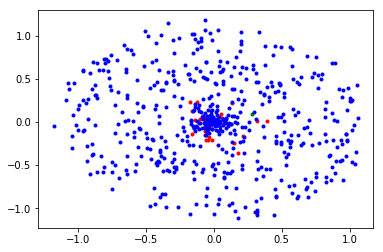

In [10]:
fp = FloatProgress(min=0, max=len(train[0]))
display(fp)
for x,t in zip(train[0], train[1]):
    y = net.Predict(10., x)
    yy = NN.OneHot(y)
    if yy[0]>0.5:
        plt.plot(x[0],x[1],'b.')
    elif yy[1]>0.5:
        plt.plot(x[0],x[1],'r.')
    else:
        plt.plot(x[0],x[1],'g.')
    fp.value += 1

A Jupyter Widget

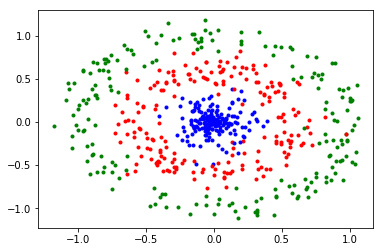

In [8]:
fp = FloatProgress(min=0, max=len(train_shuffle))
display(fp)
for x in train_shuffle:
    if x[1][0]>0.5:
        plt.plot(x[0][0],x[0][1],'b.')
    elif x[1][1]>0.5:
        plt.plot(x[0][0],x[0][1],'r.')
    else:
        plt.plot(x[0][0],x[0][1],'g.')
    fp.value += 1

In [22]:
idx = 518
print(train[1][idx])
net.Predict(10., train[0][idx])

[0. 0. 1.]


tensor([ 1.6667, -0.1989, -0.7732])

In [131]:
net.ShowBias()

  b = [0.1335559 0.1146663]
  b = [ 1.22295432e-02  5.20195870e-04  1.35570280e-02  1.09152524e-02
 -4.82401904e-03  1.04002124e-02 -1.05227195e-02  1.05511118e-02
 -5.81693603e-03 -6.68951171e-03 -3.08440998e-03  9.67296120e-03
 -1.45121536e-03 -8.47451761e-03  1.28365029e-02  2.11092886e-02
 -5.15788794e-03 -2.95260753e-02 -9.87789314e-03  2.12197080e-02
 -2.70828735e-02  8.90554767e-03 -8.05671152e-04  1.85368899e-02
  8.29417538e-03 -1.10525554e-02 -6.72775228e-03  2.13149637e-02
 -6.96162693e-03 -3.72622890e-05  9.08439606e-03 -1.56865906e-04
 -1.70638934e-02 -4.41880757e-03  1.69761926e-02 -1.16120407e-03
 -1.19285528e-02 -9.64739081e-03  1.25871776e-02  1.11266011e-02
  1.05486531e-03  3.51016968e-03  5.94086014e-03  1.01457536e-02
  1.01824561e-02 -2.02086917e-03  8.41891672e-03 -1.55731523e-02
  9.60163027e-03 -7.96670374e-03]
  b = [-0.00508129  0.00580719  0.01674417  0.00610022  0.00470639  0.00944052
 -0.00793788  0.00467956 -0.01212534 -0.02018819 -0.00409741  0.01682066


In [138]:
np.log(0.5)

-0.6931471805599453